# pump_sensor_data
El objetivo del dataset es analizar los datos de los sensores para identificar patrones o señales que puedan estar asociados con los fallos del sistema. que involucra el seguimiento de varios sensores a lo largo del tiempo para ver si hay algún cambio o comportamiento anormal antes de que ocurran los fallos.

Libreria que se utilizan

In [1]:
# utilizado para la manipulación de directorios y rutas
import os
# Cálculo científico y vectorial para python
import numpy as np
import pandas as pd
# Libreria para graficos
from matplotlib import pyplot
# Modulo de optimizacion en scipy
from scipy import optimize
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# para graficos
import seaborn as sns

Primero se carga el dataset en una variable

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Inteligecia Artificial l/Machine learning/praticas/sensor.csv')
# echamos un vistazo al dataset
data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


Debemos ver tambien los detalles del dataset

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

Necesitamos convertir los datos a enteros o flotantes(reales) para trabajar con ellos y eliminar los datos no importantes(como el indice**"Unnamed: 0"**) o completos vacios(como la columna **"sensor_15"**)

In [4]:
# Convertir la columna de timestamp a objetos de fecha
data['timestamp'] = pd.to_datetime(data['timestamp'])
# Convertir los valores de timestamp a números enteros
data['timestamp'] = data['timestamp'].astype(int)


# revisamos
print(data.head())
print('_'*90)
data.info()

   Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  1522540800000000000   2.465394   47.09201    53.2118   
1           1  1522540860000000000   2.465394   47.09201    53.2118   
2           2  1522540920000000000   2.444734   47.35243    53.2118   
3           3  1522540980000000000   2.460474   47.09201    53.1684   
4           4  1522541040000000000   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440

Eliminamos las columnas que no son utiles

**'sensor_15'**

**'Unnamed: 0'**

In [5]:
# Eliminar las columnas no relevantes
data = data.drop(columns=['sensor_15','Unnamed: 0'])

# Revisamos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  int64  
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_16       220289 non-null  float64
 17  sensor_17 

Revisar que tipos de clases o etiquetas tiene la columna "y -> objetivo"

matplotlib.axes._axes.Axes

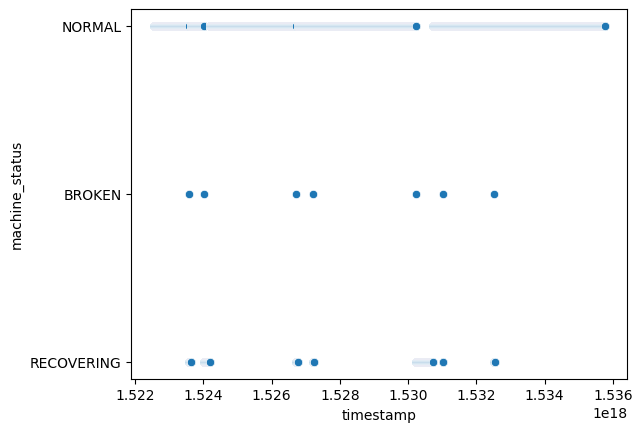

In [6]:
type(sns.scatterplot(x='timestamp', y='machine_status',data=data))

In [7]:
#Ver que tipos de clases o etiquetas tiene la columna objetivo
data['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

Convertimos esas etiquetas a etiquetas numericas para trabajar con ellos

In [8]:
# Convertimos los valores a numericas 0 a 2 o mas si habrian mas categorias
data['machine_status'] = data['machine_status'].map({'NORMAL':0,'BROKEN':1, 'RECOVERING':2 })

# Revisamos
data['machine_status'].unique()

array([0, 1, 2])

Seria bueno saber si tenemos valores nulo o vacios en el dataset... aunque ya se nota en el data.info() que no no tienen una constacia de numeros sino que varian . Para verificar hacemos:

In [9]:
# Verificar si hay valores nulos en cada columna
valores_nulos = data.isnull().sum()

# Comprobar si algún valor nulo fue encontrado
if valores_nulos.sum() == 0:
    print('No hay valores nulos en el dataset.')
else:
    print('Se encontraron valores nulos por columna:')
    print(valores_nulos[valores_nulos > 0])


Se encontraron valores nulos por columna:
sensor_00    10208
sensor_01      369
sensor_02       19
sensor_03       19
sensor_04       19
sensor_05       19
sensor_06     4798
sensor_07     5451
sensor_08     5107
sensor_09     4595
sensor_10       19
sensor_11       19
sensor_12       19
sensor_13       19
sensor_14       21
sensor_16       31
sensor_17       46
sensor_18       46
sensor_19       16
sensor_20       16
sensor_21       16
sensor_22       41
sensor_23       16
sensor_24       16
sensor_25       36
sensor_26       20
sensor_27       16
sensor_28       16
sensor_29       72
sensor_30      261
sensor_31       16
sensor_32       68
sensor_33       16
sensor_34       16
sensor_35       16
sensor_36       16
sensor_37       16
sensor_38       27
sensor_39       27
sensor_40       27
sensor_41       27
sensor_42       27
sensor_43       27
sensor_44       27
sensor_45       27
sensor_46       27
sensor_47       27
sensor_48       27
sensor_49       27
sensor_50    77017
sensor_5

#Con esto ya trendriamos todos las valores del dataset con numeros entero o reales.

ahora ... como algunas columnas del dataset tienen campos vacios necesitamos completar o rrellenar esos campos y para ello usamos la media(promedio)

In [10]:
#rellenar los datos vacios con la media
data = data.fillna(data.mean())

# y revisamos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  int64  
 1   sensor_00       220320 non-null  float64
 2   sensor_01       220320 non-null  float64
 3   sensor_02       220320 non-null  float64
 4   sensor_03       220320 non-null  float64
 5   sensor_04       220320 non-null  float64
 6   sensor_05       220320 non-null  float64
 7   sensor_06       220320 non-null  float64
 8   sensor_07       220320 non-null  float64
 9   sensor_08       220320 non-null  float64
 10  sensor_09       220320 non-null  float64
 11  sensor_10       220320 non-null  float64
 12  sensor_11       220320 non-null  float64
 13  sensor_12       220320 non-null  float64
 14  sensor_13       220320 non-null  float64
 15  sensor_14       220320 non-null  float64
 16  sensor_16       220320 non-null  float64
 17  sensor_17 

<Figure size 1200x600 with 0 Axes>

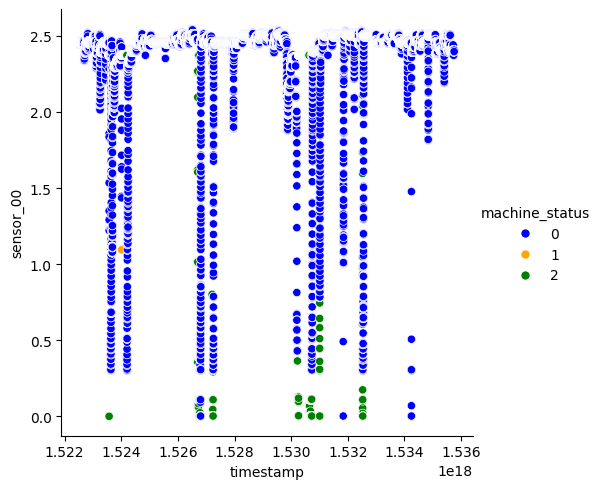

In [11]:
import matplotlib.pyplot as plt
colores = {0: 'blue', 1: 'orange', 2: 'green'}
plt.figure(figsize=(12, 6))  # Ajustar el ancho y alto de la figura
# Crear el gráfico
sns.relplot(data=data, x="timestamp", y="sensor_00", hue="machine_status", palette=colores)
# Mostrar el gráfico
plt.show()

# Con el dataset listo. tenemos que separar los valores en "X" y "y"

In [12]:
# Separamos los ejemplos en "X" y "y"
X = data.drop(columns=['machine_status']).values
y = data['machine_status'].values
print(X)
print('_'*50)
print(y)

[[1.52254080e+18 2.46539400e+00 4.70920100e+01 ... 6.77083400e+01
  2.43055600e+02 2.01388900e+02]
 [1.52254086e+18 2.46539400e+00 4.70920100e+01 ... 6.77083400e+01
  2.43055600e+02 2.01388900e+02]
 [1.52254092e+18 2.44473400e+00 4.73524300e+01 ... 6.71296300e+01
  2.41319400e+02 2.03703700e+02]
 ...
 [1.53575982e+18 2.39652800e+00 4.76996498e+01 ... 1.55381900e+02
  1.83049260e+02 2.32060200e+02]
 [1.53575988e+18 2.40636600e+00 4.76996498e+01 ... 1.53935200e+02
  1.83049260e+02 2.34085600e+02]
 [1.53575994e+18 2.39652800e+00 4.76996498e+01 ... 1.50463000e+02
  1.83049260e+02 2.34085600e+02]]
__________________________________________________
[0 0 0 ... 0 0 0]


solo por contexto se revisa la cantidad ejemplos para cada categoria

In [13]:
# Calcula el número de ejemplos por clase en y
num_clases = np.bincount(y)
# Imprime el número de ejemplos por clase
for clase, num_ejemplos in enumerate(num_clases):
    print(f'Etiquetas de la clase {clase}: {num_ejemplos}')

Etiquetas de la clase 0: 205836
Etiquetas de la clase 1: 7
Etiquetas de la clase 2: 14477


# ahora toca Normalizar la matris "X"
nota: siempre normaliza para evitar problema de balanceo

In [14]:
from sklearn.preprocessing import StandardScaler
# Crea un objeto StandardScaler
scaler = StandardScaler()
# Ajusta y transforma toda la matriz de características
X_norm = scaler.fit_transform(X)

# Revisamos
print(X_norm)

[[-1.73204295e+00  2.31449742e-01 -1.51674693e-01 ...  5.53137637e-01
   1.14014446e+00 -1.24016035e-02]
 [-1.73202722e+00  2.31449742e-01 -1.51674693e-01 ...  5.53137637e-01
   1.14014446e+00 -1.24016035e-02]
 [-1.73201150e+00  1.80128627e-01 -7.26133074e-02 ...  5.22905766e-01
   1.10715597e+00  9.49949505e-03]
 ...
 [ 1.73201150e+00  6.03810161e-02  3.27997916e-02 ...  5.13321360e+00
   1.08004771e-15  2.77789845e-01]
 [ 1.73202722e+00  8.48194055e-02  3.27997916e-02 ...  5.05763784e+00
   1.08004771e-15  2.96952833e-01]
 [ 1.73204295e+00  6.03810161e-02  3.27997916e-02 ...  4.87624974e+00
   1.08004771e-15  2.96952833e-01]]


# Los datos ya estan listos para el calculo


funcion de la **sigmoide**, que devuelve una probabilidad

In [15]:
def calcularSigmoide(z):
    return 1.0 / (1.0 + np.exp(-z))

Funcion de **Costo**: calcula el costo y el gradiente del costo para un conjunto de valores dado

In [16]:
def calcularCosto(theta, X, y, lambda_):
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = calcularSigmoide(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    # Se aplica regularizacion en la siguiente linea
    grad = grad + (lambda_ / m) * temp

    return J, grad
    # j = num_real   el costo
    # grad = vector  el gradiente

# Funcion "**One_Vs_All**"

In [17]:
def oneVsAll(X, y, num_labels, lambda_):

    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)


    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(calcularCosto,
                                initial_theta,
                                (X, (y == (c + 1)), lambda_),
                                jac=True,
                                method='BFGS',
                                options=options)

        all_theta[c] = res.x

    return all_theta

# Tenemos que separar un 80% para entrenamiento y 20% para pueba
ojo: se debe garantizar que el conjunto de prueba entre el 80% de los datos de cada clase(etiqueta)

In [18]:
# libreria
from sklearn.model_selection import train_test_split

# es para la division proporcional de cada clase
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.2,random_state=2,
                                                    stratify=y) # <- esto garentiza que se va ha separar el 80% de cada etiqueta(clase)

revisamos que si se hayan separado correctamente

In [19]:
#revisamos
# Calcula el número de ejemplos por clase en y
num_clases = np.bincount(y_train)
# Imprime el número de ejemplos por clase
for clase, num_ejemplos in enumerate(num_clases):
    print(f'Etiquetas 80% de la clase {clase}: {num_ejemplos}')

Etiquetas 80% de la clase 0: 164669
Etiquetas 80% de la clase 1: 5
Etiquetas 80% de la clase 2: 11582


In [20]:
#revisamos
# Calcula el número de ejemplos por clase en y
num_clases = np.bincount(y_test)
# Imprime el número de ejemplos por clase
for clase, num_ejemplos in enumerate(num_clases):
    print(f'Etiquetas 20% de la clase {clase}: {num_ejemplos}')

Etiquetas 20% de la clase 0: 41167
Etiquetas 20% de la clase 1: 2
Etiquetas 20% de la clase 2: 2895


# Bien, con todo listo, hacemos el entrenamiento del Modelo
 les damos valores a : lambda,  num_labels

In [21]:
# asignamos parametros para :
num_labels = 3
lambda_ = 0.001
# y llamamos a la funcion one vs all
all_theta = oneVsAll(X_train, y_train, num_labels, lambda_)

In [22]:
# revisamos all_Theta
print(all_theta)

[[-1.13115542e+01 -2.73801324e-02 -1.39205814e-01  2.40308716e-02
   5.82216148e-02  7.01240925e-03 -6.28589596e-02 -4.29486612e-02
  -1.42178297e-01 -9.88480932e-02 -1.00751071e-01 -1.09252211e-01
  -1.16786237e-02 -1.64455181e-02 -4.43538767e-02  1.69809576e-02
   3.06078004e-02  2.83304094e-02  2.99351297e-02  2.54071734e-02
   3.01146884e-02  2.87528996e-02  2.76751579e-02  2.67870962e-02
   2.65232173e-02  2.99783378e-02  2.86126972e-02  2.71901463e-02
   8.43917687e-03  8.25495207e-02  3.84068443e-02  2.99490553e-02
   3.55965726e-02  1.74782645e-02  3.10255840e-02  8.94035464e-03
   1.19445792e-02 -5.41175115e-02  1.36936707e-02  1.53384918e-01
   7.11748597e-02  8.99483811e-02 -5.24478557e-02 -8.40610213e-02
  -7.53915457e-02 -6.39199298e-02 -4.75041479e-02 -3.96903308e-02
   9.94566917e-03  7.45770460e-02  4.66037944e-02  1.29227824e-01
   5.68045156e-02]
 [-1.11817629e+01  6.34281514e-02  1.11858021e+00 -1.74408273e+00
   1.12241009e-01  1.07061966e+00 -8.65379903e-01 -1.1592

In [23]:
# tamaño de:
print('tamaño de all_theta\n',all_theta.shape)
print ('-'*20)
print('tamaño de X_test\n',X_test.shape)

tamaño de all_theta
 (3, 53)
--------------------
tamaño de X_test
 (44064, 52)


Funcion de **prediccion One vs All**

In [24]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # OJO : para que se pueda hacer la prediccion necesitamos que theta y X_test tengan la misma cantidad de columnas.
    # esto porque es regla de multiplicacion de matrices y la matriz all_theta se transpone luego

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1) ##-> esto agrega una columna de unos a la X que entro
    p = np.argmax(calcularSigmoide(X.dot(all_theta.T)), axis = 1)

    return p       # por que la etiquetas van desde el 0 hasta n
    #return p+1    # si tus etiquetas inician desde 1 hasta n SOLO AGREGAR +1

# Por ultimo se hace las predicciones con el otro 20% de los datos

In [25]:
# Realiza las predicciones utilizando la función predictOneVsAll
predic = predictOneVsAll(all_theta, X_test)

# Calcula la precisión del modelo en el conjunto de prueba
precision_test = np.mean(predic == y_test) * 100
print('Precision del conjunto de prueba: {:.2f}%'.format(precision_test))

# Calcula los ejemplos donde el modelo acertó y donde se equivocó
aciertos = np.sum(predic == y_test)
errores = np.sum(predic != y_test)

print(f'Ejemplos acertados: {aciertos}')
print(f'Ejemplos erróneos: {errores}')

Precision del conjunto de prueba: 55.63%
Ejemplos acertados: 24511
Ejemplos erróneos: 19553
